In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Understanding
1. What is Monkeypox?

Monkeypox is an illness caused by the monkeypox virus. It is a viral zoonotic infection, meaning that it can spread from animals to humans. It can also spread from humans to other humans and from the environment to humans.

2. What are symtomps of monkeypox?

Monkeypox can cause a range of signs and symptoms. While some people have less severe symptoms, others may develop more serious illness and need care in a health facility. Those typically at higher risk include people who are pregnant, children and persons that are immunocompromised.

The most common symptoms of monkeypox identified during the 2022 outbreak include fever, headache, muscle aches, back pain, low energy and swollen lymph nodes, followed or accompanied by the development of a rash which may last for two to three weeks. The rash can affect the face, palms of the hands, soles of the feet, groin, genital and/or anal regions. It may also be found in the mouth, throat, anus or vagina, or on the eyes. The number of sores can range from one to several thousand. Sores on the skin begin flat, then fill with liquid before they crust over, dry up and fall off, with a fresh layer of skin forming underneath.

There are ongoing studies to keep track of and better understand symptoms during this new outbreak, including what parts of the body can be affected and how long symptoms may last.

In [2]:
df = pd.read_csv('DATA.csv')
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [3]:
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe().T

,count,unique,top,freq
Patient_ID,25000,25000,P0,1
Systemic Illness,25000,4,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


In [6]:
df.shape

(25000, 11)

In [7]:
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

Missing Data Exploration

In [8]:
listitem = []
for col in df.columns:
    listitem.append({
        'column' : col,
        'data type' : df[col].dtype,
        'null total' : df[col].isna().sum(),
        'null pctg' : round(df[col].isna().sum()/len(df[col])*100,2),
        'n_unique' : df[col].nunique(),
        'sample' : df[col].drop_duplicates().sample(2).values   
    })
    
pd.DataFrame(listitem)

,column,data type,null total,null pctg,n_unique,sample
0,Patient_ID,object,0,0.0,25000,"[P849, P21439]"
1,Systemic Illness,object,0,0.0,4,"[Muscle Aches and Pain, Fever]"
2,Rectal Pain,bool,0,0.0,2,"[True, False]"
3,Sore Throat,bool,0,0.0,2,"[True, False]"
4,Penile Oedema,bool,0,0.0,2,"[False, True]"
5,Oral Lesions,bool,0,0.0,2,"[True, False]"
6,Solitary Lesion,bool,0,0.0,2,"[True, False]"
7,Swollen Tonsils,bool,0,0.0,2,"[True, False]"
8,HIV Infection,bool,0,0.0,2,"[False, True]"
9,Sexually Transmitted Infection,bool,0,0.0,2,"[True, False]"


In [9]:
for x in df.columns :
  print({x : (df[x].unique())})

{'Patient_ID': array(['P0', 'P1', 'P2', ..., 'P24997', 'P24998', 'P24999'], dtype=object)}
{'Systemic Illness': array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)}
{'Rectal Pain': array([False,  True])}
{'Sore Throat': array([ True, False])}
{'Penile Oedema': array([ True, False])}
{'Oral Lesions': array([ True, False])}
{'Solitary Lesion': array([False,  True])}
{'Swollen Tonsils': array([ True, False])}
{'HIV Infection': array([False,  True])}
{'Sexually Transmitted Infection': array([False,  True])}
{'MonkeyPox': array(['Negative', 'Positive'], dtype=object)}


Observation 1 
1. There are 25000 records in the dataframe.
2. There exists no missing data.
3. Except Patient_ID, every feature has categorical values


In [10]:
# Remove the columns that has no significance
df = df.drop(columns = 'Patient_ID', axis=1)

In [11]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,None,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


Data Visualization

In [12]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
import plotly.express as px
print(df["MonkeyPox"].value_counts())
names = df["MonkeyPox"].unique()
values = df["MonkeyPox"].value_counts()
fig = px.pie(names = names, values= values, title=col.upper(), width = 400, height = 400)
fig.show()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64


In [13]:
for col in df.columns:
  if col != 'MonkeyPox':
    names = df[col].unique()
    values = df[col].value_counts()
    fig = px.pie(names = names, values= values, title=col.upper())
    fig.update_layout(margin=dict(l=30, r=30, t=30, b=30))
    fig.show()

Observation 2
1. All the features are equally balanced.
2. Target column is imbalanced.

Distribution of MonkeyPox among different features

In [14]:
for x in df.columns:
  if x != 'MonkeyPox':
    fig = px.histogram(df, x = x, color='MonkeyPox', title = x.upper())
    fig.show()

Observation 3
1. the distribution of data with respect to target is symetrically spead with the features

Correlation Analysis

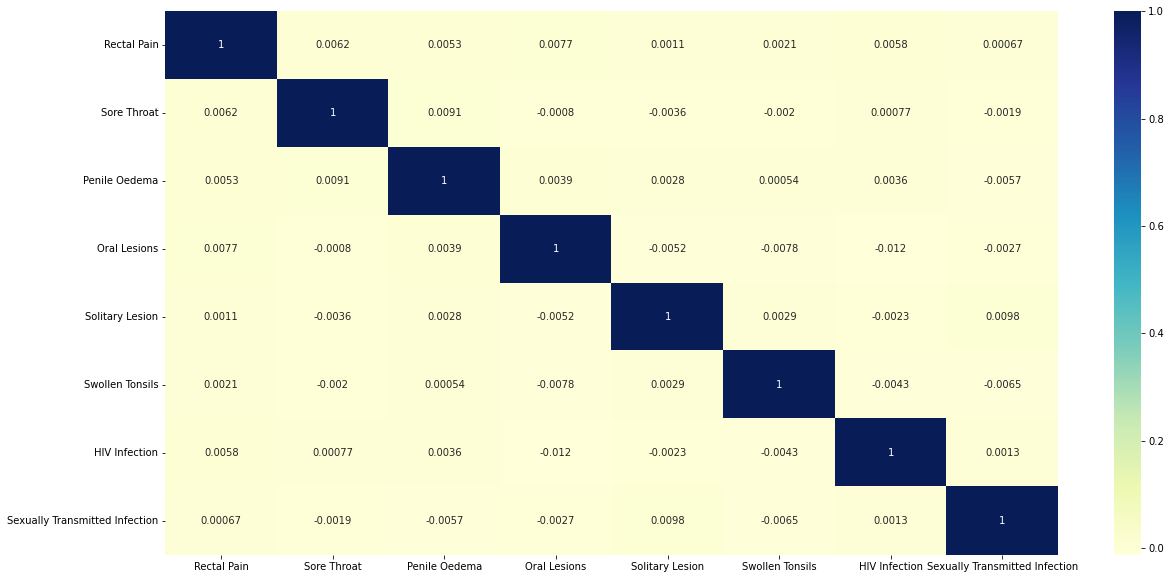

In [15]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [16]:
df.shape

(25000, 10)

Observation 4 
1. No features are significatly correlated

Data Preprocessing

In [17]:
# Apply label encoding on binary features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in df.columns[1 : ]:
  df[x] = le.fit_transform(df[x])

In [18]:
# Apply One-hot encoding for systemic illness 
df = pd.get_dummies(df, columns = ['Systemic Illness'])

In [19]:
# Avoid dummy trap
df = df.drop(columns = ['Systemic Illness_None'], axis = 1)

In [20]:
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,0
4,1,1,1,0,0,1,1,0,1,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Rectal Pain                             25000 non-null  int64
 1   Sore Throat                             25000 non-null  int64
 2   Penile Oedema                           25000 non-null  int64
 3   Oral Lesions                            25000 non-null  int64
 4   Solitary Lesion                         25000 non-null  int64
 5   Swollen Tonsils                         25000 non-null  int64
 6   HIV Infection                           25000 non-null  int64
 7   Sexually Transmitted Infection          25000 non-null  int64
 8   MonkeyPox                               25000 non-null  int64
 9   Systemic Illness_Fever                  25000 non-null  uint8
 10  Systemic Illness_Muscle Aches and Pain  25000 non-null  uint8
 11  Systemic Illnes

In [22]:
X = df.drop(columns = ['MonkeyPox'], axis = 1)
Y = df['MonkeyPox']

Train and Test Data split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn import metrics
error_rate = []
acc_score = []
for i in range(1, 40):
  kclassifier = KNeighborsClassifier(n_neighbors = i)
  kclassifier.fit(X_train, Y_train)
  Y_predk = kclassifier.predict(X_test)
  error_rate.append(np.mean(Y_predk != Y_test))
  acc_score.append(metrics.accuracy_score(Y_test, Y_predk))

Minimum error:- 0.3118 at K = 38


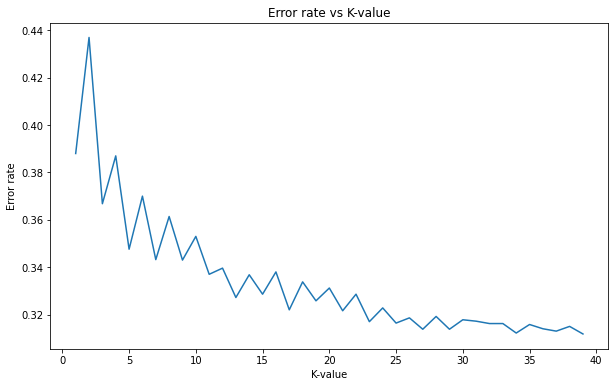

In [26]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate)
plt.title('Error rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Error rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum Accuracy:- 68.82000000000001 at K = 38


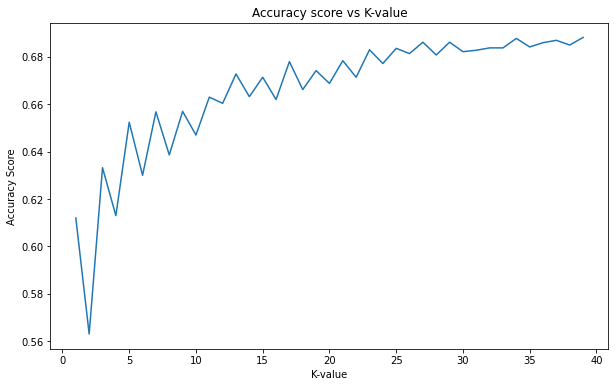

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), acc_score)
plt.title('Accuracy score vs K-value')
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
print("Maximum Accuracy:-",max(acc_score) * 100,"at K =",acc_score.index(max(acc_score)))

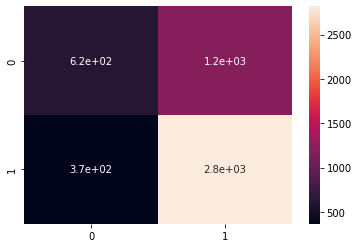

In [28]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predk), annot = True)

Logisic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression()
lrClassifier.fit(X_train, Y_train)
Y_predlr = lrClassifier.predict(X_test)

In [30]:
print('Accuracy Logistic Regression:', metrics.accuracy_score(Y_test, Y_predlr) * 100, '%')

Accuracy Logistic Regression: 69.88 %


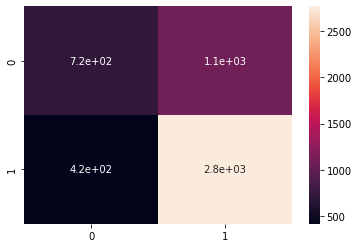

In [31]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predlr), annot = True)

Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_predt = tree.predict(X_test)

In [33]:
print('Accuracy Decision Trees:', metrics.accuracy_score(Y_test, Y_predt) * 100, '%')

Accuracy Decision Trees: 67.46 %


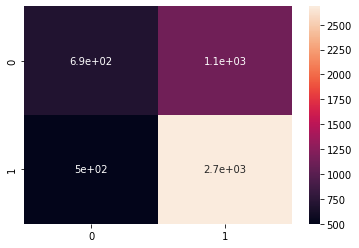

In [34]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predt), annot = True)

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_predrf = forest.predict(X_test)

In [36]:
print('Accuracy Random Forest:', metrics.accuracy_score(Y_test, Y_predrf) * 100, '%')

Accuracy Random Forest: 67.75999999999999 %


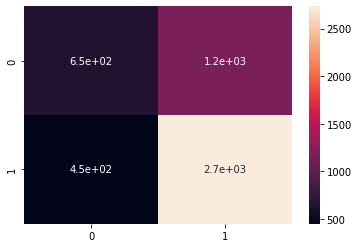

In [37]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predrf), annot = True)

Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_predgnb = gnb.predict(X_test)

In [39]:
print('Accuracy Gaussian Naive Bayes:', metrics.accuracy_score(Y_test, Y_predgnb) * 100, '%')

Accuracy Gaussian Naive Bayes: 66.66 %


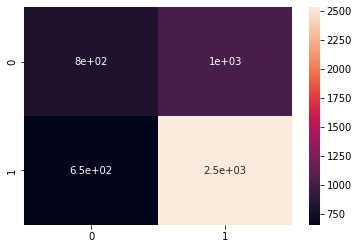

In [40]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predgnb), annot = True)

XGBoost Classifier

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 130, learning_rate = 0.3, max_depth = 2)
xgb.fit(X_train, Y_train)
Y_predxgb = xgb.predict(X_test)

In [42]:
print('Accuracy XGBoost:', metrics.accuracy_score(Y_test, Y_predxgb) * 100, '%')

Accuracy XGBoost: 70.14 %


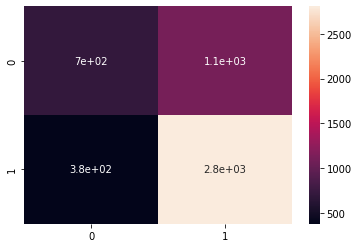

In [43]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predxgb), annot = True)

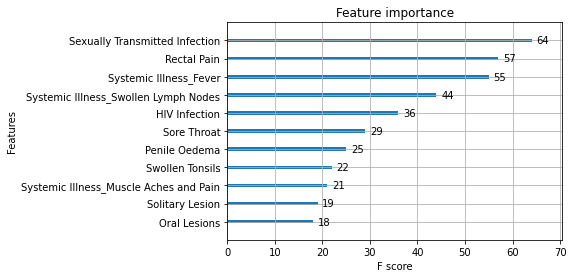

In [44]:
from xgboost.plotting import plot_importance
plot_importance(xgb)

Bagging Classifier

In [45]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(X_train, Y_train)
Y_predbag = bag.predict(X_test)

In [46]:
print('Accuracy Bagging:', metrics.accuracy_score(Y_test, Y_predbag) * 100, '%')

Accuracy Bagging: 67.67999999999999 %


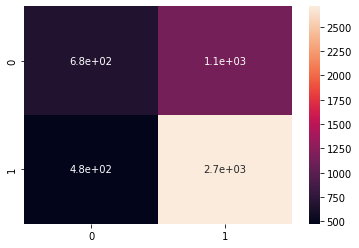

In [47]:
sns.heatmap(metrics.confusion_matrix(Y_test, Y_predbag), annot = True)

In [48]:
print("Maximum Accuracy with kNN:",max(acc_score) * 100,"at K =",acc_score.index(max(acc_score)))
print('Accuracy Logistic Regression:', metrics.accuracy_score(Y_test, Y_predlr) * 100, '%')
print('Accuracy Decision Trees:', metrics.accuracy_score(Y_test, Y_predt) * 100, '%')
print('Accuracy Random Forest:', metrics.accuracy_score(Y_test, Y_predrf) * 100, '%')
print('Accuracy Gaussian Naive Bayes:', metrics.accuracy_score(Y_test, Y_predgnb) * 100, '%')
print('Accuracy XGBoost:', metrics.accuracy_score(Y_test, Y_predxgb) * 100, '%')
print('Accuracy Bagging:', metrics.accuracy_score(Y_test, Y_predbag) * 100, '%')

Maximum Accuracy with kNN: 68.82000000000001 at K = 38
Accuracy Logistic Regression: 69.88 %
Accuracy Decision Trees: 67.46 %
Accuracy Random Forest: 67.75999999999999 %
Accuracy Gaussian Naive Bayes: 66.66 %
Accuracy XGBoost: 70.14 %
Accuracy Bagging: 67.67999999999999 %
